In [1]:
import pandas as pd
import numpy as np
import random as rnd

from sklearn.cross_validation import KFold, cross_val_score

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier



train_=pd.read_csv('../train_allcols.csv')
validate_=pd.read_csv('../validate_allcols.csv')
#test=pd.read_csv('../testwDSM.csv')

train_.shape, validate_.shape, #test.shape

/Users/arc/Codes/DM-Lab/dmlab/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


((301619, 62), (148560, 62))

In [2]:
train = train_.query('DSMCRIT in [4,9]')
validate = validate_.query('DSMCRIT in [4,9]')
print train['DSMCRIT'].value_counts()
print validate.shape

4    81008
9    27144
Name: DSMCRIT, dtype: int64
(53482, 62)


In [3]:
#alcohol
#print train['DSMCRIT'].value_counts() / train['DSMCRIT'].count()
#print train['SUB1'].value_counts() / train['SUB1'].count()

In [4]:
#train.query('SUB1 == 4')['DSMCRIT'].value_counts() / train.query('SUB1 == 4')['DSMCRIT'].count()

In [5]:
#train.describe()
train = train.sample(10000)
validate = validate.sample(3000)
train.shape, #validate.shape, #validate.head(2)

((10000, 62),)

In [6]:
#train = train.query('SUB1 <= 10').query('SUB2 <= 10')
#validate = validate.query('SUB1 <= 10').query('SUB2 <= 10')

drop_list = ['DSMCRIT',  #'NUMSUBS'
             ]
drop_list_select = ['RACE', 'PREG', 'ARRESTS', 'PSYPROB', 'DETNLF', 'ETHNIC', 'MARSTAT', 'GENDER', 'EDUC'
                   ,'LIVARAG', 'EMPLOY', 'SUB3']

retain_list = ['RACE','PCPFLG','PRIMINC','LIVARAG','BENZFLG','HLTHINS','GENDER','ROUTE3','PRIMPAY',
               'MARSTAT','PSYPROB','ROUTE2','EMPLOY','SUB2','FRSTUSE3','FREQ3','FRSTUSE2','OTHERFLG',
               'EDUC','FREQ2','FREQ1','YEAR',
               'PSOURCE','DETCRIM','DIVISION','REGION','NOPRIOR','NUMSUBS','ALCDRUG',
               'METHUSE','FRSTUSE1','AGE','COKEFLG','OPSYNFLG','IDU','SERVSETA','ROUTE1','MARFLG',
               'MTHAMFLG','HERFLG',
               'ALCFLG','SUB1']
X_train = train[retain_list]
#X_train = train.drop(drop_list + drop_list_select, axis=1)
Y_train = train["DSMCRIT"]
X_validate = validate[retain_list]
Y_validate = validate["DSMCRIT"]
#X_test  = test.drop(drop_list, axis=1)
X_train.shape, #X_validate.shape, #X_test.shape



((10000, 42),)

In [7]:
print X_train.columns.tolist()

['RACE', 'PCPFLG', 'PRIMINC', 'LIVARAG', 'BENZFLG', 'HLTHINS', 'GENDER', 'ROUTE3', 'PRIMPAY', 'MARSTAT', 'PSYPROB', 'ROUTE2', 'EMPLOY', 'SUB2', 'FRSTUSE3', 'FREQ3', 'FRSTUSE2', 'OTHERFLG', 'EDUC', 'FREQ2', 'FREQ1', 'YEAR', 'PSOURCE', 'DETCRIM', 'DIVISION', 'REGION', 'NOPRIOR', 'NUMSUBS', 'ALCDRUG', 'METHUSE', 'FRSTUSE1', 'AGE', 'COKEFLG', 'OPSYNFLG', 'IDU', 'SERVSETA', 'ROUTE1', 'MARFLG', 'MTHAMFLG', 'HERFLG', 'ALCFLG', 'SUB1']


In [8]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_classif,chi2
#Selector_f = SelectPercentile(f_classif, percentile=25)
Selector_f = SelectKBest(f_classif, k=10)
Selector_f.fit(X_train,Y_train)

zipped = zip(X_train.columns.tolist(),Selector_f.scores_)
ans = sorted(zipped, key=lambda x: x[1])
for n,s in ans:
     print 'F-score: %3.2ft for feature %s' % (s,n)
        
        
#X_train= SelectKBest(f_classif, k=10).fit_transform(X_train, Y_train)


F-score: 1.03t for feature METHUSE
F-score: 1.10t for feature PCPFLG
F-score: 1.89t for feature ROUTE1
F-score: 2.81t for feature EDUC
F-score: 4.13t for feature SUB1
F-score: 5.15t for feature OTHERFLG
F-score: 5.32t for feature YEAR
F-score: 5.78t for feature HLTHINS
F-score: 6.13t for feature ALCFLG
F-score: 6.33t for feature REGION
F-score: 9.54t for feature DIVISION
F-score: 11.16t for feature BENZFLG
F-score: 11.62t for feature HERFLG
F-score: 14.96t for feature MARFLG
F-score: 15.48t for feature IDU
F-score: 17.11t for feature GENDER
F-score: 31.25t for feature SERVSETA
F-score: 34.56t for feature OPSYNFLG
F-score: 37.95t for feature MTHAMFLG
F-score: 39.07t for feature PRIMPAY
F-score: 41.07t for feature RACE
F-score: 48.47t for feature ROUTE3
F-score: 59.72t for feature COKEFLG
F-score: 61.41t for feature ROUTE2
F-score: 64.75t for feature FREQ3
F-score: 66.21t for feature SUB2
F-score: 75.99t for feature FRSTUSE3
F-score: 95.49t for feature MARSTAT
F-score: 106.52t for featur

In [9]:
#one hot
from sklearn import preprocessing

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_train)

# 3. Transform
onehotlabels = enc.transform(X_train).toarray()
X_train = onehotlabels

onehotlabels = enc.transform(X_validate).toarray()
X_validate = onehotlabels

X_train.shape, #X_validate.shape

((10000, 242),)

In [10]:
#kfold
kf = 3

In [11]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)
logreg.fit(X_train, Y_train)
#Y_pred = logreg.predict(X_test)

l_acc_log = cross_val_score(logreg, X_train, Y_train, cv=kf)
acc_log = round(np.mean(l_acc_log), 3)

l_acc_log = ['%.3f' % elem for elem in l_acc_log]
print l_acc_log
print acc_log

/Users/arc/Codes/DM-Lab/dmlab/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


['0.836', '0.849', '0.842']
0.842


In [12]:
# Random Forest (slow)

random_forest = RandomForestClassifier(n_estimators=200, max_depth=20, n_jobs=-1)
random_forest.fit(X_train, Y_train)
#Y_pred = random_forest.predict(X_test)

l_acc_random_forest = cross_val_score(random_forest, X_train, Y_train, cv=kf)
acc_random_forest = round(np.mean(l_acc_random_forest), 3)

l_acc_random_forest = ['%.3f' % elem for elem in l_acc_random_forest]
print l_acc_random_forest
print acc_random_forest

['0.851', '0.855', '0.854']
0.853


In [13]:
# Linear SVC
linear_svc = LinearSVC(C=1.0)
linear_svc.fit(X_train, Y_train)
#Y_pred = linear_svc.predict(X_test)

l_acc_linear_svc = cross_val_score(linear_svc, X_train, Y_train, cv=kf)
acc_linear_svc = round(np.mean(l_acc_linear_svc), 3)
l_acc_linear_svc = ['%.3f' % elem for elem in l_acc_linear_svc]
print l_acc_linear_svc
print acc_linear_svc

['0.834', '0.849', '0.839']
0.841


In [14]:
print 'predict-sub2-woflags-newsplit-sample20000'
models = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest','Linear SVC'],
    'Cross Validation': [l_acc_log, 
              l_acc_random_forest, l_acc_linear_svc],
    'Cross Validation Mean': [acc_log, 
              acc_random_forest, acc_linear_svc]
    })
print models.sort_values(by='Cross Validation Mean', ascending=False)


predict-sub2-woflags-newsplit-sample20000
        Cross Validation  Cross Validation Mean                Model
1  [0.851, 0.855, 0.854]                  0.853        Random Forest
0  [0.836, 0.849, 0.842]                  0.842  Logistic Regression
2  [0.834, 0.849, 0.839]                  0.841           Linear SVC


Confusion matrix, without normalization
[[   0    0    0    0    0    0    0    0]
 [   0 2122    0    0    0    0   98    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0  380    0    0    0    0  400    0]
 [   0    0    0    0    0    0    0    0]]


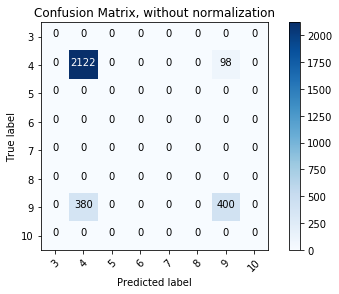

/Users/arc/Codes/DM-Lab/dmlab/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in divide


Normalized confusion matrix
[[  nan   nan   nan   nan   nan   nan   nan   nan]
 [ 0.    0.96  0.    0.    0.    0.    0.04  0.  ]
 [  nan   nan   nan   nan   nan   nan   nan   nan]
 [  nan   nan   nan   nan   nan   nan   nan   nan]
 [  nan   nan   nan   nan   nan   nan   nan   nan]
 [  nan   nan   nan   nan   nan   nan   nan   nan]
 [ 0.    0.49  0.    0.    0.    0.    0.51  0.  ]
 [  nan   nan   nan   nan   nan   nan   nan   nan]]


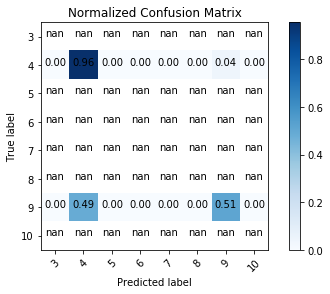

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Y_pred = random_forest.predict(X_validate)


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_validate, Y_pred, labels=[3,4,5,6,7,8,9,10])

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = cm #confusion_matrix(y_test, Y_pred)
#class_names = ["ANXIETY","DEPRESS","SCHIZOPHRENIA","BIPOLAR","ATTENTION DEFICIT"]
class_names = [3,4,5,6,7,8,9,10]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, class_names,
                      title='Confusion Matrix, without normalization')


#plt.savefig('cnf matrix', dpi=150)
plt.show()

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')

#plt.figure(figsize=(16,8))
#plt.savefig('cnf matrix norm', dpi=150)
plt.show()


In [16]:
print X_validate.shape,Y_pred.shape, Y_validate.shape
print  round(random_forest.score(X_validate, Y_validate) * 100, 2)


(3000, 242) (3000,) (3000,)
84.07
